In [2]:
import mujoco
import mujoco_viewer
import matplotlib.pyplot as plt
import numpy as np
import os
from lxml import etree
import mujoco.viewer
import time


In [27]:
xml = "xml.xml"
model = mujoco.MjModel.from_xml_path("xml.xml")
data = mujoco.MjData(model)


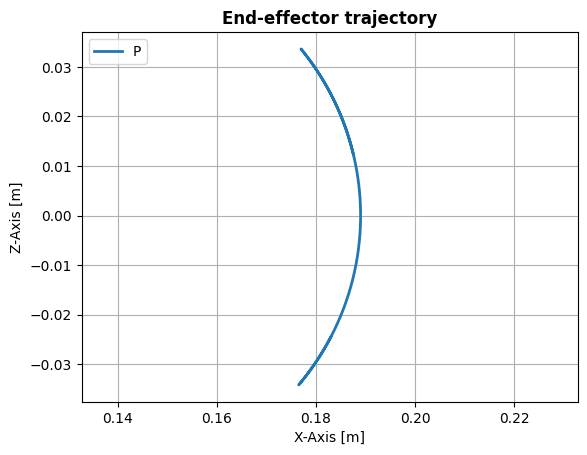

In [29]:
SIMEND = 20
TIMESTEP = 0.001
STEP_NUM = int(SIMEND / TIMESTEP)
timeseries = np.linspace(0, SIMEND, STEP_NUM)
def set_torque(t):
    A = 30
    data.ctrl[0] = A*np.sin(20*t)
    data.ctrl[1] = -A*np.sin(20*t)

EE_position_x = []
EE_position_z = []
site_id = mujoco.mj_name2id(model, mujoco.mjtObj.mjOBJ_SITE, "carriage")
viewer = mujoco_viewer.MujocoViewer(model, 
                                    data,
                                    title="2R", 
                                    width=1920, 
                                    height=1080)


for i in range(STEP_NUM):
    if viewer.is_alive:
        set_torque(data.time)

        position_EE = data.site_xpos[site_id]
        EE_position_x.append(position_EE[0])
        EE_position_z.append(position_EE[2])

        mujoco.mj_step(model, data)
        viewer.render()

    else:
        break
viewer.close()

midlength = int(STEP_NUM/2)

plt.clf()
plt.plot(EE_position_x, EE_position_z, '-', linewidth=2, label='P')
plt.title('End-effector trajectory', fontsize=12, fontweight='bold')
plt.legend(loc='upper left')
plt.xlabel('X-Axis [m]')
plt.ylabel('Z-Axis [m]')
plt.axis('equal')
plt.grid()
plt.draw()
